# Executive Summary

**Team01 Final Project -- Music Trend Analysis during COVID-19 and Comparison to Pre-COVID**

*Team Member(s): Robin Jo, Chieh-Hsin(Darren) Chen, Yuning Bai, Qiqi Liang*

#Background
By analyzing audio features of ‘Viral 50’ Charts from 2019 to 2020, analyze the change in the features of trending music in the countries where the COVID-19 hit the hardest and the least. (assuming the audio features we select to analyze reflects people’s musical demand and sentiment /=reason for choosing to listen to the song) (https://spotifycharts.com/viral/ad/weekly/latest). Furthermore, implement sentiment analysis using the lyrics of the tracks in the dataset.

After cleaning up the initial data, we retrieved audio features data using the Spotify API. After adding audio features to the initial dataset, proceeded with the analysis.

# Project description

## 1.Audio Features / Track Attributes

**Danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

**Energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

**Liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.

**Tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**Valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

*https://developer.spotify.com/documentation/web-api/reference/#endpoint-get-audio-features*

We will be using Danceability, Energy, Liveness, Tempo, and Valence for the analysis.

## 2.Countries List (Hit by COVID-19 the hardest & the least)

**Hit by COVID-19 the hardest:**

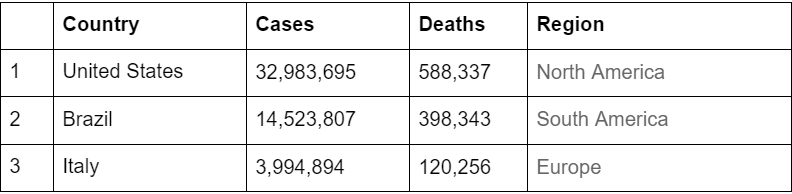

**Hit by COVID-19 the least:**

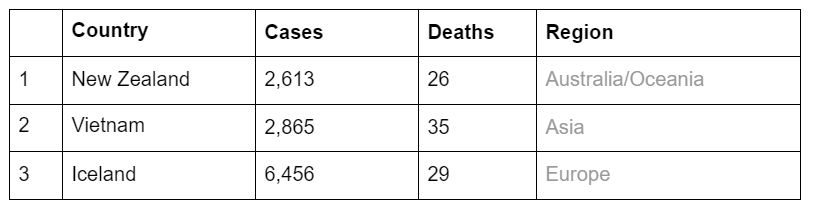


*Data Retrieve from: https://www.worldometers.info/coronavirus/countries-where-coronavirus-has-spread/*

## 3.Peak Dates


**Hit by COVID-19 the hardest Peak Dates:**
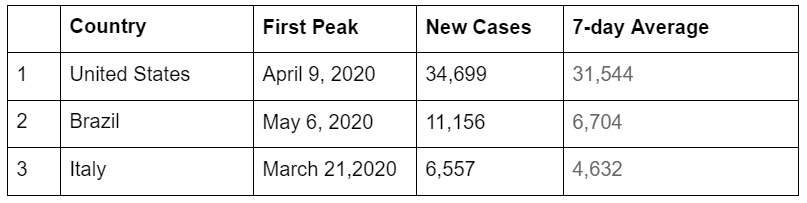


**Hit by COVID-19 the least Peak Dates:**

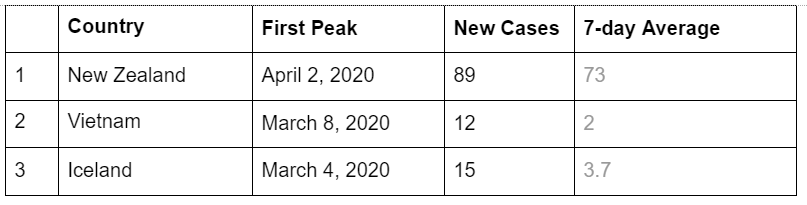

*Peak date select from: https://news.google.com/covid19/map?hl=en-US&gl=US&ceid=US%3Aen&mid=%2Fm%2F09c7w0*


## 4.Distribution of dates (10 each, before and after the peak) for each country

Besed on the peak date, we calculate the all other distributed 10 dates and after using Excel as following:

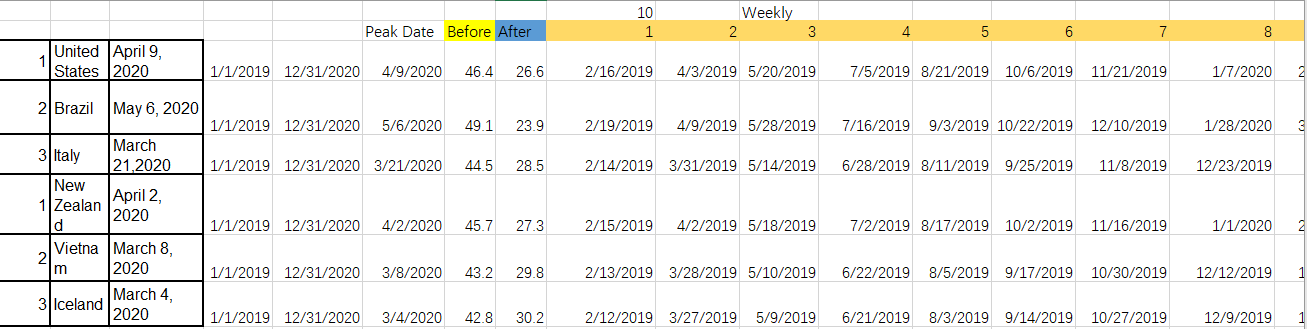

## 5.Get data from spotifycharts.com and import into google drive
Based on when the first spike happened and the evenly distribute 10 dates before (throughout 2019) and after (throughout 2020), we retrieved each countries' data from *https://spotifycharts.com/viral/ad/daily/latest*. From spotifycharts, we can download a weekly vitral 50 dataset of each country as a csv file. Each of us uplaoded the assigned Countries' dataset to our shared google drive. There are 20 dates for each country, so the total will be 120 csv files. All of our store in google drive, can access the data thougrh our shared folder.

Shared folder link:
*https://drive.google.com/drive/folders/1gPzV1FKKG0D-JsjXcS6iTtP8aeQAsZW8?usp=sharing*

## 6.Dataset cleanning & integration and Retrieving audio features using Spotify API 

1. We merge all the weekly dataset into a large dataset file for each country using Excel.
2. Generate csv file using Python:

Pre-install soptipy lib and import all the libaries we need for integrate and clean datasets.

In [ ]:
!pip install spotipy
!pip install folium

In [ ]:
import pandas as pd
import numpy as np
import glob
import requests
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import time 

Connected to Spotify API and Google Drive

In [ ]:
#Robin's API token access below (can't be shared or be used elsewhere)
#Connect to Soptify API
client_id = 'ee6ef3ef0ca840968f9e84e72aae6976'
client_secret = '985cf07022e84c7d82782ac954143c03'

credentials = spotipy.oauth2.SpotifyClientCredentials (client_id,client_secret)
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=credentials)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Function created to integrate the dataset, calls addGerneralData and addAdudFeatures fucntions then return the list of data after adding what we needed.

In [ ]:
def modifyData(frameName):
  Spotify_list = pd.read_excel(frameName, header=None)
  Spotify_list.columns = list(Spotify_list.loc[0])
  Spotify_list = Spotify_list.loc[1:].reset_index(drop = True)
  addGeneralData(Spotify_list)
  addAudioFeature(Spotify_list)
  return Spotify_list

Function takes in dataset. First, Get countries' name and dates from column 'Filename', get Spotify unique trackID from colunm 'URL' and add the covid and pre-covd tag based on the date. Then append them after the list. 

In [ ]:
def addGeneralData(Spotify_list):
  trackID=[]
  for i in Spotify_list.URL:
    trackID.append(i[31:])

  date=[]
  country=[]
  for i in Spotify_list.Filename: 
    date.append(i[17:27])
    country.append(i[7:9])

  Spotify_list['TrackID']=trackID
  Spotify_list['Date']=date
  Spotify_list['Country']=country
  Spotify_list['Date'] = pd.to_datetime(Spotify_list.Date)
  Spotify_list.sort_values(['Date', 'Position'], ascending=[True, True], inplace=True)

  tag=[]
  value = 0
  count = 0
  for i in Spotify_list.Date: 
    if count == 500:
      value = 1
    tag.append(value)
    count = count+1
  Spotify_list['CovidTag']=tag

Function takes in dataset. Get all the audio features we need from the Spotify API (requesting data by the trackIDs), then append after the list.

In [ ]:
def addAudioFeature(Spotify_list):
  energies = []
  dances = []
  lives = []
  temps = []
  valens = []

  for i in Spotify_list['TrackID']:
    audio_features = sp.audio_features(tracks=[i])
    energy = audio_features[0]['energy']
    energies.append(energy)
    dance = audio_features[0]['danceability']
    dances.append(dance)
    liveness = audio_features[0]['liveness']
    lives.append(liveness)
    tempo = audio_features[0]['tempo']
    temps.append(tempo)
    valence = audio_features[0]['valence']
    valens.append(valence)

  Spotify_list['Danceability']=dances
  Spotify_list['Energy']=energies
  Spotify_list['Liveness']=lives
  Spotify_list['Tempo']=temps
  Spotify_list['Valence']=valens

Load in counties' Excel files from the drive and ouput a modifed csv file. We modified the dataset country by country, because it is too slow do all countries in one for loop.

In [ ]:
pathExcel = r'/content/drive/MyDrive/Dealing_with_data_project/Spotify_Dataset/CountryExcel/' # use your path
excelList = ['Brazil.xlsx', 'Iceland.xlsx','Italy.xlsx', 'NewZealand.xlsx', 'US.xlsx', 'Vietnam.xlsx']

pathCSV = r'/content/drive/MyDrive/Dealing_with_data_project/Spotify_Dataset/CountryCSV/' # use your path
CSVList = ['Brazil.csv', 'Iceland.csv','Italy.csv', 'NewZealand.csv', 'US.csv', 'Vietnam.csv']

print(pathExcel + excelList[5])
frameName = pathExcel + excelList[5]
Spotify_list = modifyData(frameName)
Spotify_list.to_csv(pathCSV + CSVList[5], index=False)
print(Spotify_list.head(5))

#count = 0
#for count < 6:
  #print(pathExcel + name)
  #frameName = pathExcel + excelList[count]
  #modifyData(frameName)
  #Spotify_list.to_csv(pathCSV + CSVlist[count], index=False)
  #count = count + 1 
  #print(Spotify_list.head(5))

Reads in all the counties' csv files and output a merge dataset - all country csv file in the drive.

In [ ]:
pathCountryCSV = r'/content/drive/MyDrive/Dealing_with_data_project/Spotify_Dataset/CountryCSV/'
pathAllCSV = r'/content/drive/MyDrive/Dealing_with_data_project/Spotify_Dataset/'
all_files = glob.glob(pathCountryCSV + "*.csv")

filenameList = []
for filename in all_files:
    print(filename)
    df = pd.read_csv(filename)
    filenameList.append(df)

Soptify_allCountry = pd.concat(filenameList)
Soptify_allCountry.to_csv(pathAllCSV + 'AllCountry.csv', index=False)

# Project Code & Analysis

## **1. Pandas Analysis**

### 1.1 Audio Features Box-plot by Time Series

In [ ]:
import pandas as pd
import numpy as np
import altair as alt

In [ ]:
pathCSV = r'/content/drive/MyDrive/Dealing_with_data_project/Spotify_Dataset/CountryCSV/' # use your path
CSVList = ['Brazil.csv', 'Iceland.csv', 'Italy.csv', 'NewZealand.csv', 'US.csv', 'Vietnam.csv']

usFilename = pathCSV + CSVList[4]
icelandFilename = pathCSV + CSVList[1]
us_list = pd.read_csv(usFilename, encoding="utf-8",dtype="unicode")
iceland_list = pd.read_csv(icelandFilename, encoding="utf-8",dtype="unicode")

In [ ]:
us_list['Date'] = pd.to_datetime(us_list['Date'], format="%Y/%m/%d")
us_list["Danceability"] = pd.to_numeric(us_list["Danceability"])
us_list["Energy"] = pd.to_numeric(us_list["Energy"])
us_list["Liveness"] = pd.to_numeric(us_list["Liveness"])
us_list["Tempo"] = pd.to_numeric(us_list["Tempo"])
us_list["Valence"] = pd.to_numeric(us_list["Valence"])

In [ ]:
iceland_list['Date'] = pd.to_datetime(iceland_list['Date'], format="%Y/%m/%d")
iceland_list["Danceability"] = pd.to_numeric(iceland_list["Danceability"])
iceland_list["Energy"] = pd.to_numeric(iceland_list["Energy"])
iceland_list["Liveness"] = pd.to_numeric(iceland_list["Liveness"])
iceland_list["Tempo"] = pd.to_numeric(iceland_list["Tempo"])
iceland_list["Valence"] = pd.to_numeric(iceland_list["Valence"])

The following gives the audio feature - Danceability by time-series box-plot graph of the US and Iceland: 


Shows a general layout of audio features by time. 

In [ ]:
alt.Chart(us_list, width=800, height=400).mark_boxplot().encode(
    x='Date:T',
    y=alt.Y('Danceability:Q',
      scale=alt.Scale(zero=False)),
).interactive()

alt.Chart(...)

In [ ]:
alt.Chart(iceland_list, width=800, height=400).mark_boxplot().encode(
    x='Date:T',
    y=alt.Y('Danceability:Q',
      scale=alt.Scale(zero=False)),
).interactive()

alt.Chart(...)

### 1.2 Average Value of Audio Features by Time Series

In [ ]:
pathCSV = r'/content/drive/MyDrive/Dealing_with_data_project/Spotify_Dataset/' # use your path
CSVList = ['AllCountry.csv', 'MostEffectCountry.csv', 'LeastEffectCountry.csv']

allCountry = pathCSV + CSVList[0]
allCountry_list = pd.read_csv(allCountry, encoding="utf-8",dtype="unicode")

In [ ]:
allCountry_list['Date'] = pd.to_datetime(allCountry_list['Date'], format="%Y-%m-%d")
allCountry_list["Danceability"] = pd.to_numeric(allCountry_list["Danceability"])
allCountry_list["Energy"] = pd.to_numeric(allCountry_list["Energy"])
allCountry_list["Liveness"] = pd.to_numeric(allCountry_list["Liveness"])
allCountry_list["Tempo"] = pd.to_numeric(allCountry_list["Tempo"])
allCountry_list["Valence"] = pd.to_numeric(allCountry_list["Valence"])

In [ ]:
def allCountry(feature):
  df_all = pd.DataFrame({
      'Date': allCountry_list['Date'],
      'Country': allCountry_list['Country'],
      feature: allCountry_list[feature],
  })
  new_df_all = df_all.groupby(['Country','Date']).mean().reset_index()

  return alt.Chart(new_df_all,width=800,height=400).mark_line().encode(
      x='Date',
      y=alt.Y(feature,
        scale=alt.Scale(zero=False)),
      color='Country',
  ).interactive()

In [ ]:
features_list = ["Danceability","Energy","Liveness","Tempo","Valence"]

The Following graphs give the average value of each audio feature by time serices separed by each country:

br -- Brazil; is -- Iceland; it -- Italy; nz -- New Zealand; us -- United States; vn -- Vietnam;

In [ ]:
#Danceability
allCountry(features_list[0])

alt.Chart(...)

In [ ]:
#Energy
allCountry(features_list[1])

alt.Chart(...)

In [ ]:
#Liveness
allCountry(features_list[2])

alt.Chart(...)

In [ ]:
#Tempo
allCountry(features_list[3])

alt.Chart(...)

In [ ]:
#Valence
allCountry(features_list[4])

alt.Chart(...)

### 1.3 Density Plot

In this part, we used density plot to find out the change of concentation range in terms of all the different features.

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Import Data
df = pd.read_csv("/content/drive/MyDrive/Dealing_with_data_project/Spotify_Dataset/AllCountry.csv")
#print (df)

In [ ]:
# Draw Plot
def draw_DensityPlot(Country):
              df = pd.read_csv("/content/drive/MyDrive/Dealing_with_data_project/Spotify_Dataset/CountryCSV/"+Country+".csv")
              plt.figure(figsize=(6,5), dpi= 80)
              sns.kdeplot(df.loc[df['CovidTag'] == 0, "Danceability"], shade=True, color="g", label="Danceability", alpha=.5)
              sns.kdeplot(df.loc[df['CovidTag'] == 0, "Energy"], shade=True, color="r", label="Energy", alpha=.5)
              sns.kdeplot(df.loc[df['CovidTag']==0,"Liveness"], shade=True, color="dodgerblue", label="Liveness", alpha=.5)
              sns.kdeplot(df.loc[df['CovidTag'] == 0,"Valence"], shade=True, color="orange", label="Valence", alpha=.5)
 
       # Decoration
              plt.title('Density Plot of Audio Features before Covid-19 in '+Country, fontsize=22)
              plt.legend()
              plt.show()

              plt.figure(figsize=(6,5), dpi= 80)
              sns.kdeplot(df.loc[df['CovidTag'] == 1, "Danceability"], shade=True, color="g", label="Danceability", alpha=.5)
              sns.kdeplot(df.loc[df['CovidTag'] == 1,"Energy"], shade=True, color="r", label="Energy", alpha=.5)
              sns.kdeplot(df.loc[df['CovidTag']==1,"Liveness"], shade=True, color="dodgerblue", label="Liveness", alpha=.5)
              sns.kdeplot(df.loc[df['CovidTag'] == 1,"Valence"], shade=True, color="orange", label="Valence", alpha=.5)
 
         # Decoration
              plt.title('Density Plot of Audio Features during Covid-19 in '+Country, fontsize=22)
              plt.legend()
              plt.show()


During covid-19, people in U.S. tend to listen to tracks with less liveliness and less energy.

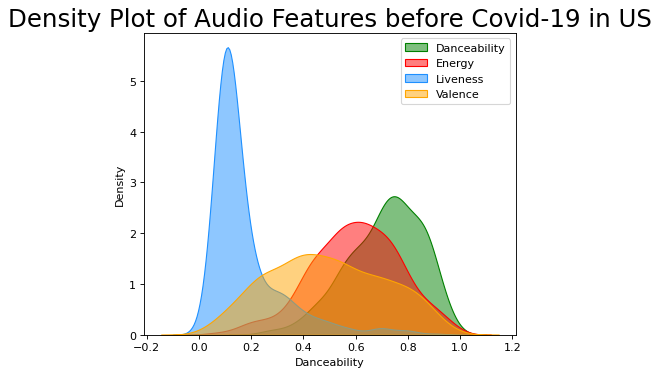

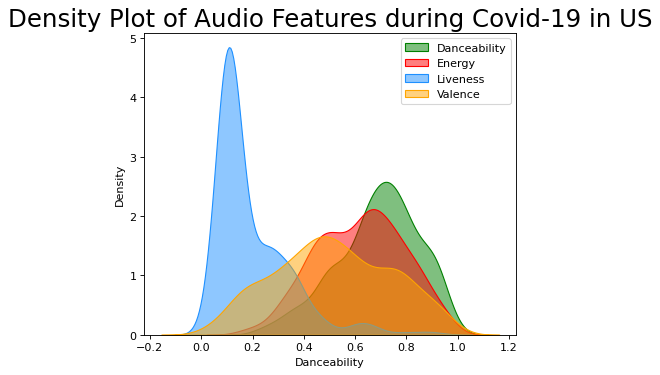

In [ ]:
draw_DensityPlot('US')

In [ ]:
draw_DensityPlot('Brazil')

In [ ]:
draw_DensityPlot('Italy')

In [ ]:
draw_DensityPlot('New Zealand')

In [ ]:
draw_DensityPlot('Vietnam')

In [ ]:
draw_DensityPlot('Iceland')

### 1.4 WordCloud Image

In [ ]:
pip install stylecloud

In [ ]:
import stylecloud
from stylecloud import gen_stylecloud

In [ ]:
TopArtist = df.Artist.value_counts()
print(TopArtist)
TopArtist.to_csv("/content/drive/MyDrive/Dealing_with_data_project/Spotify_Dataset/TopArtist.csv")

Pop Smoke        41
Doja Cat         35
BTS              34
CORPSE           32
Billie Eilish    29
                 ..
CLAVDIO           1
Woosung           1
LEISURE           1
Lee So Ra         1
El Taiger         1
Name: Artist, Length: 2367, dtype: int64


In [ ]:
stylecloud.gen_stylecloud(file_path='/content/drive/MyDrive/Dealing_with_data_project/Spotify_Dataset/TopArtist.csv',
                          icon_name='fas fa-music',
                          output_name='/content/drive/MyDrive/Dealing_with_data_project/Spotify_Dataset/TopArtist.png')

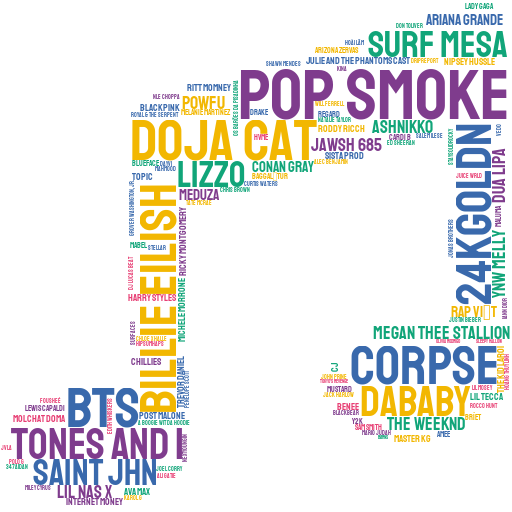

The most frequently mentioned artists are: Pop Smoke, Doja Cat, BTS, Corpse, and Billie Eilish.

###1.5 Time Series Map

Using Plotly Express time series geo map feature, visualize how the mean values of each audio features (Danceability, Energy, Liveness, Tempo, Valence) change from 2019 to 2020 for each country. Since the dates for chart data we retreived from Spotify Viral 50 (https://spotifycharts.com/viral/ad/weekly/latest) aren't the same for all countries, had to disregard the day but only applied the month, so it displays the audio feature values of each country simultaneously. 


First, import necessary modules and clean up the data.

In [ ]:
# import modules
import pandas as pd
import numpy as np
import requests
import plotly.io as pio
pio.renderers.default = 'notebook_connected'
from datetime import datetime
import plotly.graph_objects as go

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filenames = ['Brazil','Italy','New Zealand','United States','Vietnam','Iceland']

# geo_scatter on plotly can't visualize some of the countries, so manually add latitude and longitude
country_coordinates = {"Brazil": ['BRA', -15.749997, -47.949996]
                , 'Italy': ['ITA', 42.63843, 12.67430]
                , 'New Zealand': ['NZL', -41.50008, 172.83441]
                , 'United States': ['USA', 39.78373, -100.44588]
                , 'Vietnam': ['VNM', 13.29040, 108.42651]
                , 'Iceland': ['ISL', 64.98418, -18.10590]}

# Read each country's data, add geographical data from country_coordinates to csv files.
for filename in filenames:
  df = pd.read_csv('/content/drive/MyDrive/Dealing_with_data_project/Spotify_Dataset/CountryCSV/' + filename + '.csv')
  df['Date'] = df['Date'].apply(lambda x : str(x)[:10]).apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))
  df = df[['Date','Danceability','Energy','Liveness','Tempo','Valence']]
  df['Country'] = filename
  df['iso_alpha'] = country_coordinates[filename][0]
  df['lat'] = country_coordinates[filename][1]
  df['lon'] = country_coordinates[filename][2]
  filename = filename.replace(' ', '_')
  globals()['df_'+filename] = df

In [ ]:
# merge all datasets
datasets = [df_Brazil, df_Iceland, df_Italy, df_New_Zealand, df_United_States, df_Vietnam]
df_merge_country = pd.concat(datasets)

In [ ]:
df_merge_country.Country.unique()

array(['Brazil', 'Iceland', 'Italy', 'New Zealand', 'United States',
       'Vietnam'], dtype=object)

In [ ]:
# based on the date data, separately store year, month, and day in numerical values
df_merge_country['Date'] = pd.to_datetime(df_merge_country['Date'], errors ='coerce') 
df_merge_country['Year'] = df_merge_country['Date'].dt.year
df_merge_country['Month'] = df_merge_country['Date'].dt.month
df_merge_country['Day'] = df_merge_country['Date'].dt.day

In [ ]:
# use 'groupby' to calculate the mean values for audio features of the same date
dataset = df_merge_country.groupby(['Country','Date','iso_alpha','lat','lon']).mean().reset_index()
dataset

,Country,Date,iso_alpha,lat,lon,Danceability,Energy,Liveness,Tempo,Valence,Year,Month,Day
0,Brazil,2019-02-21,BRA,-15.749997,-47.949996,0.73972,0.65528,0.193542,130.10748,0.589930,2019,2,21
1,Brazil,2019-04-11,BRA,-15.749997,-47.949996,0.69652,0.65844,0.226554,122.87958,0.599286,2019,4,11
2,Brazil,2019-05-30,BRA,-15.749997,-47.949996,0.71130,0.62716,0.237370,124.16582,0.587084,2019,5,30
3,Brazil,2019-07-18,BRA,-15.749997,-47.949996,0.71126,0.64756,0.202784,130.85682,0.559164,2019,7,18
4,Brazil,2019-09-05,BRA,-15.749997,-47.949996,0.69552,0.63300,0.222948,127.04556,0.586664,2019,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Vietnam,2020-08-27,VNM,13.290400,108.426510,0.68696,0.57128,0.179732,114.97194,0.473730,2020,8,27
116,Vietnam,2020-10-01,VNM,13.290400,108.426510,0.71386,0.50725,0.163496,117.32352,0.481740,2020,10,1
117,Vietnam,2020-10-29,VNM,13.290400,108.426510,0.70470,0.59250,0.191836,117.55726,0.502140,2020,10,29
118,Vietnam,2020-11-26,VNM,13.290400,108.426510,0.68602,0.56588,0.208262,118.71898,0.433674,2020,11,26


In [ ]:
# separately create date values so it can be used as animation frame
dataset['Date_str'] = dataset['Date'].apply(lambda x: str(x)[:7])

####Danceability

In [ ]:
# find the minimum and maximum value of energy to set range_color
print(dataset['Danceability'].min())
print(dataset['Danceability'].max())

0.5949399999999999
0.7415600000000002


In [ ]:
# generate a time series map showing danceability value as the size. 

import plotly.express as px
fig = px.scatter_geo(dataset, lon = 'lon', lat = 'lat', color = 'Danceability',
                     range_color=[0.58,0.75],
                     hover_name = 'Country', size = 'Danceability',
                     size_max=30,
                     animation_frame='Date_str',
                     projection = 'natural earth'
                     )
fig.update_layout(
        title = 'The change in the value of danceability from 2019 to 2020')
fig.show(renderer='colab')

####Energy

In [ ]:
# find the minimum and maximum value of energy to set range_color
print(dataset['Energy'].min())
print(dataset['Energy'].max())

0.5002599999999999
0.6948400000000002


In [ ]:
# generate a time series map showing energy value as the size. 
fig = px.scatter_geo(dataset, lon = 'lon', lat = 'lat', color = 'Energy',
                     range_color=[0.49,0.70],
                     hover_name = 'Country', size = 'Energy',
                     size_max=30,
                     animation_frame='Date_str',
                     projection = 'natural earth'
                     )
fig.update_layout(
        title = 'The change in the value of energy from 2019 to 2020')
fig.show(renderer='colab')

####Liveness

In [ ]:
print(dataset['Liveness'].min())
print(dataset['Liveness'].max())

0.14454200000000003
0.26307200000000003


In [ ]:
# generate a time series map showing liveness value as the size. 
fig = px.scatter_geo(dataset, lon = 'lon', lat = 'lat', color = 'Liveness',
                     range_color=[0.14,0.27],
                     hover_name = 'Country', size = 'Liveness',
                     size_max=30,
                     animation_frame='Date_str',
                     projection = 'natural earth'
                     )
fig.update_layout(
        title = 'The change in the value of liveness from 2019 to 2020')
fig.show(renderer='colab')

####Tempo

In [ ]:
print(dataset['Tempo'].min())
print(dataset['Tempo'].max())

108.58479999999996
133.30356


In [ ]:
# generate a time series map showing tempo value as the size. 
fig = px.scatter_geo(dataset, lon = 'lon', lat = 'lat', color = 'Tempo',
                     range_color=[108,134],
                     hover_name = 'Country', size = 'Tempo',
                     size_max=30,
                     animation_frame='Date_str',
                     projection = 'natural earth'
                     )
fig.update_layout(
        title = 'The change in the value of tempo from 2019 to 2020')
fig.show(renderer='colab')

####Valence

In [ ]:
print(dataset['Valence'].min())
print(dataset['Valence'].max())

0.41036599999999995
0.6975799999999999


In [ ]:
# generate a time series map showing valence value as the size. 
fig = px.scatter_geo(dataset, lon = 'lon', lat = 'lat', color = 'Valence',
                     range_color=[0.4, 0.7],
                     hover_name = 'Country', size = 'Valence',
                     size_max=30,
                     animation_frame='Date_str',
                     projection = 'natural earth'
                     )
fig.update_layout(
        title = 'The change in the value of valence from 2019 to 2020')
fig.show(renderer='colab')

## **2. Regression Model & Analysis**

**Muti-Regression Model :**A.C.= After Covid/ B.C.= Before Covid

*Summary*

We want to know how each audio feature influences the track's ranking(position in each country during the time of A.C.(after Covid) and B.C.(before Covid). Thus, our dependent variable is 'Position', and independent variables are 'Danceability', 'Energy','Liveness', 'Tempo','Valence'
After running regression models for each country in A.C. and B.c., we get the following intercpet and coefficients. (Note: Position= x0 + x1*Danceability +  x2*Energy +  x3**Liveness + x4*Tempo + x5*Valence)


In [ ]:
data = {'Intercept':[36.77, 28.47, 30.12, 27,21.02,21.06,29.34,27.54,22.50,25.13,32.01,24.88], 'Danceability':[-1.64, -1.19, -1.12, -4.76, 1.47,5.04,-14.75,4.99,3.59,-1.07,-12.80,1.23],
        'Energy':[3.01, 3.60, 6.04, 6.65,8.36,2.03,-0.70,1.34,1.18,-3.85,-8.85,0.26],'Liveness':[-5.84,-6.34, 3.86, 7.11,-4.51,-1.35,-11.31,-9.41,-1.66,-8.11,2.80,-7.33],
        'Tempo':[-2.25,1.16,-0.04,-0.02,0.01,-3.21,0.06,-0.01,0.006,0.02,0.02,0.02],'Valence':[-2.31, 5.35, -4.53, -1.02,-4.80,1.5,2.83,-4.71,-1.11,4.41,8.52,-4.69] }  
dfmetrix = pd.DataFrame(data, index =['US B.C.', 'US A.C.', 'Brazil B.C.', 'Brazil A.C.','Italy B.C.', 'Italy A.C.','New Zealand B.C.', 'New Zealand B.C.', 'Vietnam B.C.', 'Vietnam A.C.', 'Iceland B.C.', 'Iceland A.C.' ])  
print(dfmetrix)  

                  Intercept  Danceability  Energy  Liveness  Tempo  Valence
US B.C.               36.77         -1.64    3.01     -5.84 -2.250    -2.31
US A.C.               28.47         -1.19    3.60     -6.34  1.160     5.35
Brazil B.C.           30.12         -1.12    6.04      3.86 -0.040    -4.53
Brazil A.C.           27.00         -4.76    6.65      7.11 -0.020    -1.02
Italy B.C.            21.02          1.47    8.36     -4.51  0.010    -4.80
Italy A.C.            21.06          5.04    2.03     -1.35 -3.210     1.50
New Zealand B.C.      29.34        -14.75   -0.70    -11.31  0.060     2.83
New Zealand B.C.      27.54          4.99    1.34     -9.41 -0.010    -4.71
Vietnam B.C.          22.50          3.59    1.18     -1.66  0.006    -1.11
Vietnam A.C.          25.13         -1.07   -3.85     -8.11  0.020     4.41
Iceland B.C.          32.01        -12.80   -8.85      2.80  0.020     8.52
Iceland A.C.          24.88          1.23    0.26     -7.33  0.020    -4.69


We can see the following clustered bar chart, In terms of hardest hit countries, In US before COVID, Valence, Tempo, Liveness, Danceability help the track increase ranking In US after COVID, only liveness, dancibility help the track increase ranking

In Brazil before COVID, valence, danceability help the track increase ranking In Brazil after COVID, valence and danceability still are the factors helping the tracks increase ranking, but the weight of valance > that of daceability has changed into daceability> valence Tempo seems have no specific infulence on the ranking no matter A.C. or B.C. in Brazil.

In Italy before COVID, Valence and Liveness help the tracks increase ranking In Italy after COVID, Tempo and Liveness help the tracks increase ranking

Conclusion, among hardest hit coutries, there are no similiar audio fearure which can increase ranking, meaning each country have its own factor even though in the same tough situation.
In terms of least hit countries, In New Zealand before COVID, Liveness and Danceability help the track increase ranking In New Zealand after COVID, Liveness and Valence help the track increase ranking

In Vietnam before COVID, Valence and Liveness help the track increase ranking In Vietnam after COVID, Liveness, Dancibility, and Energy help the track increase ranking

In Iceland before COVID, Energy and Danceability help the track increase ranking In Iceland after COVID, Valence and Livness help the track increase ranking

Interestingly, the key audio features which help the tracks increase ranking among least hit coutries have changed dramatically among thoes countries compared with hardest hit countries we assume the phenomenon is opposite.

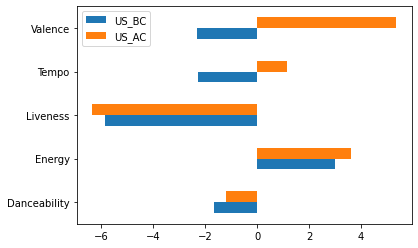

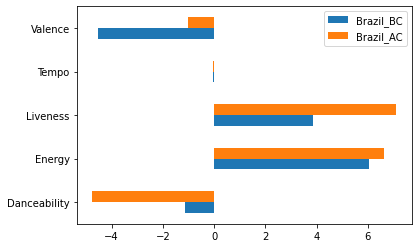

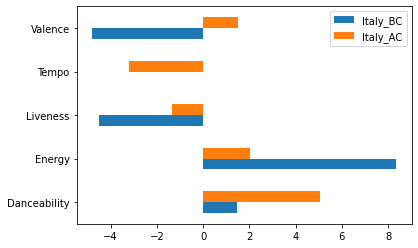

In [ ]:
#US
US_BC = [-1.64395203 , 3.0157386 , -5.8487325 ,-2.25678748
, -2.3193362]
US_AC =[-1.19804696,3.60168834,-6.34457158,1.165022,5.35886]

index =['Danceability',
        'Energy','Liveness', 'Tempo', 'Valence']


dfUS = pd.DataFrame({'US_BC': US_BC, 'US_AC': US_AC}, 
                    index=index)
ax = dfUS.plot.barh()
#Brazil
Brazil_BC = [-1.12563386 , 6.04772437 , 3.86734097 ,-0.04616719
, -4.53518106]
Brazil_AC =[-4.76249289,6.65054559,7.11529346,-0.02685406,-1.02340562]

index =['Danceability',
        'Energy','Liveness', 'Tempo', 'Valence']


dfBrazil = pd.DataFrame({'Brazil_BC': Brazil_BC, 'Brazil_AC': Brazil_AC}, 
                    index=index)
ax = dfBrazil.plot.barh()
#Italy
Italy_BC = [1.4746837 , 8.36083977, -4.51962638 ,0.01022599
, -4.80405916]
Italy_AC =[5.0435852,2.039333,-1.353711,-3.2110447,1.5098431]

index =['Danceability',
        'Energy','Liveness', 'Tempo', 'Valence']


dfItaly = pd.DataFrame({'Italy_BC': Italy_BC, 'Italy_AC': Italy_AC}, 
                    index=index)
ax = dfItaly.plot.barh()

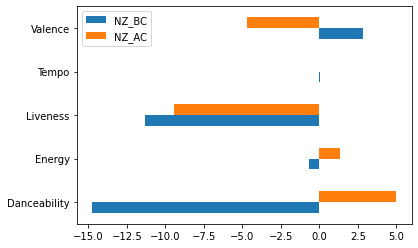

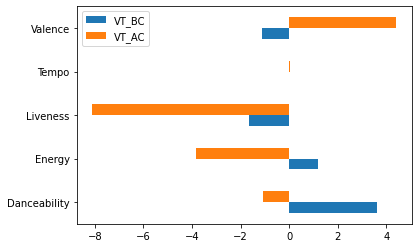

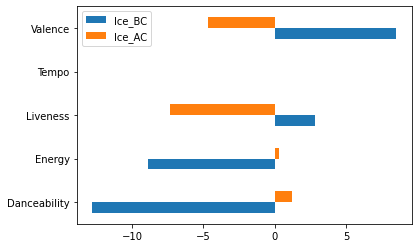

In [ ]:
#New Zealand
NZ_BC = [-14.757784 , -0.7059629 , -11.3196033 ,0.0633722
, 2.83075]
NZ_AC =[4.99757755,1.3438576,-9.431595,-0.0193321,-4.71235793]

index =['Danceability',
        'Energy','Liveness', 'Tempo', 'Valence']


dfNZ = pd.DataFrame({'NZ_BC': NZ_BC, 'NZ_AC': NZ_AC}, 
                    index=index)
ax = dfNZ.plot.barh()
#Vietnam
VT_BC = [3.5943247 , 1.18569372 ,-1.66601437 ,0.00682165
, -1.113422]
VT_AC =[-1.074722,-3.851712,-8.11091,0.02224269,4.41215874]

index =['Danceability',
        'Energy','Liveness', 'Tempo', 'Valence']


dfVT = pd.DataFrame({'VT_BC': VT_BC, 'VT_AC': VT_AC}, 
                    index=index)
ax = dfVT.plot.barh()
#Iceland
Ice_BC = [-12.8052424 , -8.85511757280171, 2.80171711 ,0.02357089
, 8.52146487]
Ice_AC =[1.23116288,0.26258334,-7.33666768,0.02659419,-4.69052997]

index =['Danceability',
        'Energy','Liveness', 'Tempo', 'Valence']


dfIce = pd.DataFrame({'Ice_BC': Ice_BC, 'Ice_AC': Ice_AC}, 
                    index=index)
ax = dfIce.plot.barh()

> ### **Iceland A.C. Model**

In [ ]:
import pandas as pd
import requests
from io import StringIO

##https://drive.google.com/file/d/1W_GG0RzJd-sl2pYeMOEKYUDTzs7yCP6o/view?usp=sharing

orig_url='https://drive.google.com/file/d/1W_GG0RzJd-sl2pYeMOEKYUDTzs7yCP6o/view?usp=sharing'

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
df_Iceland = pd.read_csv(csv_raw)
#print(df_Iceland.head())

In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import math

from scipy import stats

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
df_Iceland.columns

Index(['Filename', 'Position', 'Track Name', 'Artist', 'URL', 'TrackID',
       'Date', 'Country', 'CovidTag', 'Danceability', 'Energy', 'Liveness',
       'Tempo', 'Valence'],
      dtype='object')

In [ ]:
df_Iceland_new=df_Iceland[['Position','Danceability','Energy','Liveness','Tempo','Valence']]
df_Iceland_new

,Position,Danceability,Energy,Liveness,Tempo,Valence
0,1,0.903,0.327,0.1080,100.008,0.274
1,2,0.770,0.724,0.3530,121.975,0.898
2,3,0.863,0.631,0.1230,128.977,0.817
3,4,0.726,0.431,0.6960,144.026,0.348
4,5,0.843,0.741,0.0960,168.983,0.680
...,...,...,...,...,...,...
495,46,0.894,0.764,0.0323,127.038,0.796
496,47,0.398,0.239,0.1020,151.538,0.315
497,48,0.737,0.802,0.0931,144.015,0.682
498,49,0.858,0.584,0.2240,140.208,0.714


In [ ]:
#Make sure all data type is float
df_Iceland_new=df_Iceland_new.astype(float)
df_Iceland_new.dtypes

Position        float64
Danceability    float64
Energy          float64
Liveness        float64
Tempo           float64
Valence         float64
dtype: object

,Position,Danceability,Energy,Liveness,Tempo,Valence
Position,1.000000,-0.044700,-0.034234,-0.066042,0.038043,-0.053249
Danceability,-0.044700,1.000000,0.183981,-0.043118,-0.064093,0.466727
Energy,-0.034234,0.183981,1.000000,0.150197,0.176072,0.313849
Liveness,-0.066042,-0.043118,0.150197,1.000000,-0.032849,-0.062778
Tempo,0.038043,-0.064093,0.176072,-0.032849,1.000000,0.057342
Valence,-0.053249,0.466727,0.313849,-0.062778,0.057342,1.000000


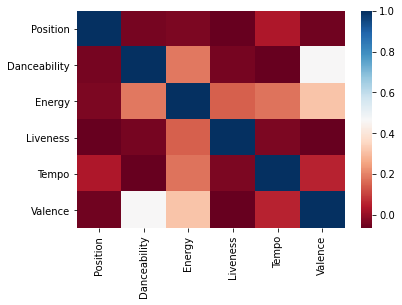

In [ ]:
# We want to check multicollinearity, if there is, we will drop those independent variables having high correlation with each other
#Print out a correlation matrix of our df_new
corr=df_Iceland_new.corr()

display(corr)

#plot a heatmap
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,cmap="RdBu")

In [ ]:
# Here, we also use variance_inflation_factor to check multicollinearity. General speaking, we will drop variables with value above 5

df_Iceland_new_before=df_Iceland_new
X1=sm.tools.add_constant(df_Iceland_new_before)

series_before=pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])], index= X1.columns)

display(series_before)

const           49.421120
Position         1.009820
Danceability     1.299060
Energy           1.187907
Liveness         1.046680
Tempo            1.051007
Valence          1.390372
dtype: float64

In [ ]:
# Since there's no variable with value above 5, we keep all variables
df_Iceland_new_after=df_Iceland_new_before

<function matplotlib.pyplot.show>

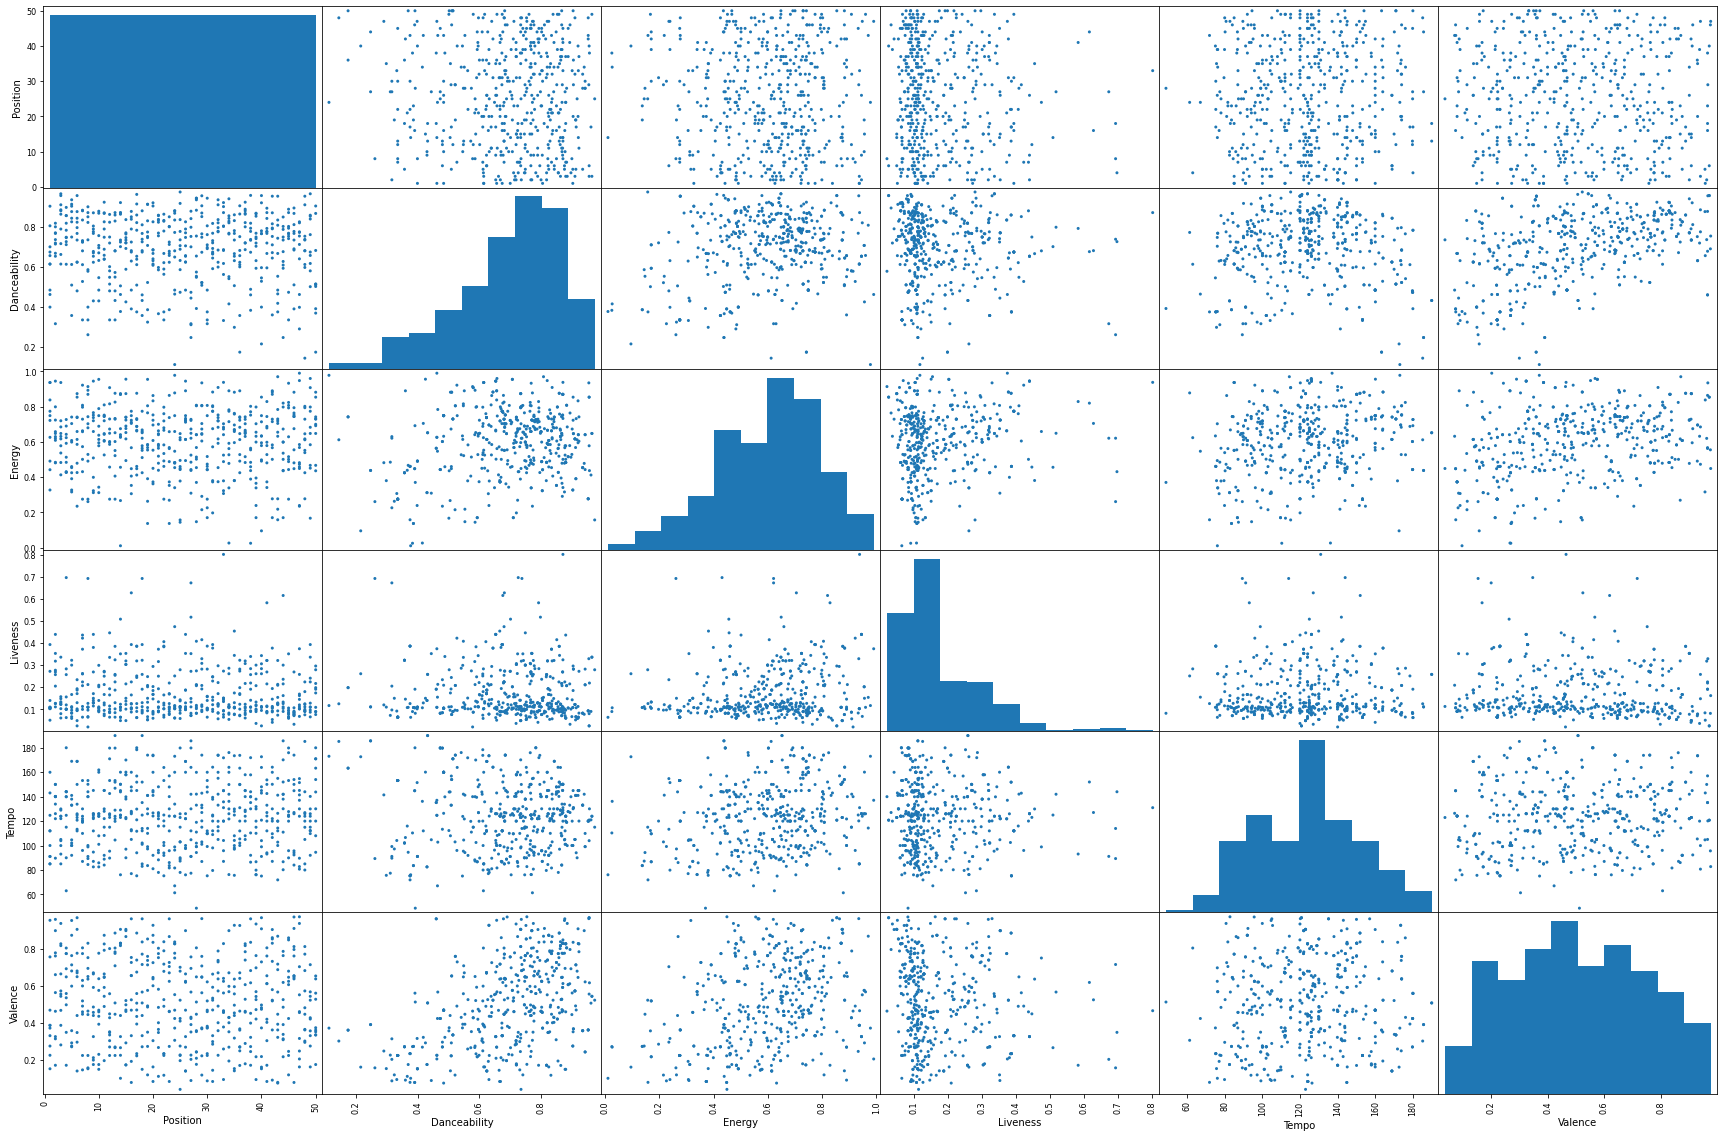

In [ ]:
# We can also use scatter_matrix to check if there has linear pattern
pd.plotting.scatter_matrix(df_Iceland_new_after,alpha=1,figsize=(30,20))
plt.show

In [ ]:
#Define our input and output variable
X=df_Iceland_new_after[['Danceability','Energy','Liveness','Tempo','Valence']]
Y=df_Iceland_new_after['Position']

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20, random_state=1)

#Create an instance for our model
regression_model=LinearRegression()

#fit the model
regression_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print( 'This is intercept :') 
print(regression_model.intercept_)
print( 'This is coefficeints :') 
print(regression_model.coef_)

This is intercept :
24.880672894038042
This is coefficeints :
[ 1.23116288  0.26258334 -7.33666768  0.02659419 -4.69052997]


> ### **Iceland B.C. Model**

In [ ]:
orig_url='https://drive.google.com/file/d/1xfn_2YF-INW2XJfQLFYSuSoNH6v-WjEJ/view?usp=sharing'

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
df_Iceland_BC = pd.read_csv(csv_raw)
print(df_Iceland_BC.head())

                                            Filename  Position  \
0  [viral-is-weekly-2019-02-07--2019-02-07]viral-...         1   
1  [viral-is-weekly-2019-02-07--2019-02-07]viral-...         2   
2  [viral-is-weekly-2019-02-07--2019-02-07]viral-...         3   
3  [viral-is-weekly-2019-02-07--2019-02-07]viral-...         4   
4  [viral-is-weekly-2019-02-07--2019-02-07]viral-...         5   

                               Track Name         Artist  \
0                        Lost in the Fire  Gesaffelstein   
1  Dancing With A Stranger (with Normani)      Sam Smith   
2             Giant (with Rag'n'Bone Man)  Calvin Harris   
3                                    Wow.    Post Malone   
4                                Thotiana       Blueface   

                                                 URL                 TrackID  \
0  https://open.spotify.com/track/7wFybC8jBH3zE13...  7wFybC8jBH3zE139OpCtpG   
1  https://open.spotify.com/track/6Qs4SXO9dwPj5GK...  6Qs4SXO9dwPj5GKvVOv8Ki   
2 

In [ ]:
df_Iceland_BCnew=df_Iceland_BC[['Position','Danceability','Energy','Liveness','Tempo','Valence']]
df_Iceland_BCnew

,Position,Danceability,Energy,Liveness,Tempo,Valence
0,1,0.663,0.675,0.1170,101.004,0.176
1,2,0.741,0.520,0.2220,102.998,0.347
2,3,0.807,0.887,0.0811,122.015,0.606
3,4,0.833,0.539,0.1010,99.947,0.385
4,5,0.906,0.382,0.1130,104.025,0.391
...,...,...,...,...,...,...
495,46,0.871,0.702,0.0912,125.089,0.675
496,47,0.844,0.574,0.1100,158.047,0.476
497,48,0.517,0.570,0.1270,166.075,0.423
498,49,0.794,0.793,0.0952,123.941,0.677


,Position,Danceability,Energy,Liveness,Tempo,Valence
Position,1.000000,-0.085180,-0.041217,0.019542,0.062639,0.005658
Danceability,-0.085180,1.000000,0.098789,-0.061324,-0.062430,0.376023
Energy,-0.041217,0.098789,1.000000,0.148849,0.071097,0.331626
Liveness,0.019542,-0.061324,0.148849,1.000000,0.032865,0.008163
Tempo,0.062639,-0.062430,0.071097,0.032865,1.000000,0.058308
Valence,0.005658,0.376023,0.331626,0.008163,0.058308,1.000000


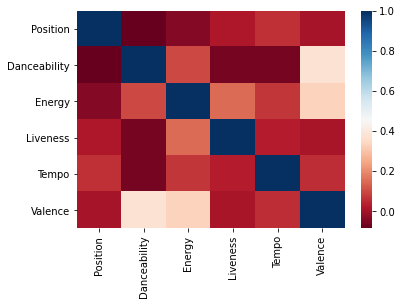

In [ ]:
corr=df_Iceland_BCnew.corr()
display(corr)
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,cmap="RdBu")

In [ ]:
df_Iceland_BCnew_before=df_Iceland_BCnew
X1=sm.tools.add_constant(df_Iceland_BCnew_before)
series_before=pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])], index= X1.columns)
display(series_before)

const           55.304523
Position         1.015082
Danceability     1.189398
Energy           1.157783
Liveness         1.029856
Tempo            1.018234
Valence          1.306668
dtype: float64

In [ ]:
# Since there's no variable with value above 5, we keep all variables
df_Iceland_BCnew_after=df_Iceland_BCnew_before

In [ ]:
# For the following model, we don't plot scatter plot to check linear pattern again to reduce pages. 
# We will go directly building the model

X=df_Iceland_BC[['Danceability','Energy','Liveness','Tempo','Valence']]
print(X)
Y=df_Iceland_BC['Position']

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20, random_state=1)

#Create an instance for our model
regression_model_Iceland_BC=LinearRegression()

#fit the model
regression_model_Iceland_BC.fit(X_train,y_train)

     Danceability  Energy  Liveness    Tempo  Valence
0           0.663   0.675    0.1170  101.004    0.176
1           0.741   0.520    0.2220  102.998    0.347
2           0.807   0.887    0.0811  122.015    0.606
3           0.833   0.539    0.1010   99.947    0.385
4           0.906   0.382    0.1130  104.025    0.391
..            ...     ...       ...      ...      ...
495         0.871   0.702    0.0912  125.089    0.675
496         0.844   0.574    0.1100  158.047    0.476
497         0.517   0.570    0.1270  166.075    0.423
498         0.794   0.793    0.0952  123.941    0.677
499         0.785   0.431    0.0887  127.085    0.236

[500 rows x 5 columns]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print( 'This is intercept :') 
print(regression_model_Iceland_BC.intercept_)
print( 'This is coefficeints :') 
print(regression_model_Iceland_BC.coef_)

This is intercept :
32.01086747311878
This is coefficeints :
[-12.8052424   -8.85511757   2.80171711   0.02357089   8.52146487]


> ### **Brazil A.C. Model**

,Position,Danceability,Energy,Liveness,Tempo,Valence
Position,1.000000,-0.094832,0.060699,0.096032,-0.026174,-0.042069
Danceability,-0.094832,1.000000,0.024800,-0.249457,0.044176,0.363488
Energy,0.060699,0.024800,1.000000,0.180579,0.278395,0.425140
Liveness,0.096032,-0.249457,0.180579,1.000000,-0.010234,0.115368
Tempo,-0.026174,0.044176,0.278395,-0.010234,1.000000,0.243568
Valence,-0.042069,0.363488,0.425140,0.115368,0.243568,1.000000


const           62.271884
Position         1.021046
Danceability     1.301719
Energy           1.324432
Liveness         1.150350
Tempo            1.115639
Valence          1.516459
dtype: float64

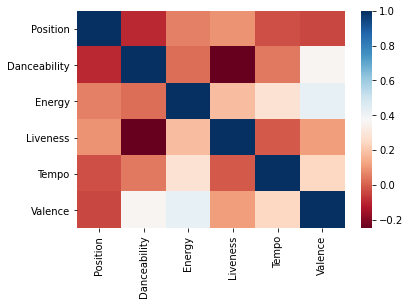

In [ ]:
orig_url='https://drive.google.com/file/d/1butFDyIxw5k5Uioqq4nFlK4ElIDs3v6Z/view?usp=sharing'

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
df_Brazil_AC = pd.read_csv(csv_raw)


df_Brazil_ACnew=df_Brazil_AC[['Position','Danceability','Energy','Liveness','Tempo','Valence']]
df_Brazil_ACnew

corr=df_Brazil_ACnew.corr()
display(corr)
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,cmap="RdBu")

df_Brazil_ACnew_before=df_Brazil_ACnew
X1=sm.tools.add_constant(df_Brazil_ACnew_before)
series_before=pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])], index= X1.columns)
display(series_before)

In [ ]:
# Since there's no variable with value above 5, we keep all variables
df_Brazil_ACnew_after=df_Brazil_ACnew_before
X=df_Brazil_AC[['Danceability','Energy','Liveness','Tempo','Valence']]
print(X)
Y=df_Brazil_AC['Position']

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20, random_state=1)

regression_model_Brazil_AC=LinearRegression()
regression_model_Brazil_AC.fit(X_train,y_train)
print( 'This is intercept :') 
print(regression_model_Brazil_AC.intercept_)
print( 'This is coefficeints :') 
print(regression_model_Brazil_AC.coef_)

     Danceability  Energy  Liveness    Tempo  Valence
0           0.962   0.787    0.1760  130.003    0.968
1           0.844   0.878    0.3920  150.045    0.965
2           0.728   0.431    0.0996  130.022    0.629
3           0.462   0.339    0.0893   92.106    0.149
4           0.881   0.661    0.1010  124.023    0.965
..            ...     ...       ...      ...      ...
495         0.623   0.629    0.0894   94.550    0.653
496         0.512   0.677    0.4300  132.241    0.776
497         0.567   0.645    0.0822   85.107    0.888
498         0.745   0.624    0.2080   94.008    0.885
499         0.378   0.583    0.4880   91.901    0.245

[500 rows x 5 columns]
This is intercept :
26.999966317271372
This is coefficeints :
[-4.76249289  6.65054559  7.11529346 -0.02685406 -1.02340562]


> ### **Brazil B.C. Model**

,Position,Danceability,Energy,Liveness,Tempo,Valence
Position,1.000000,-0.045853,0.052605,0.080482,-0.081362,-0.053116
Danceability,-0.045853,1.000000,0.053140,-0.177129,0.042890,0.426170
Energy,0.052605,0.053140,1.000000,0.209523,0.226421,0.356807
Liveness,0.080482,-0.177129,0.209523,1.000000,0.013451,0.049046
Tempo,-0.081362,0.042890,0.226421,0.013451,1.000000,0.199633
Valence,-0.053116,0.426170,0.356807,0.049046,0.199633,1.000000


const           64.420850
Position         1.021005
Danceability     1.292598
Energy           1.245896
Liveness         1.096839
Tempo            1.082633
Valence          1.450939
dtype: float64

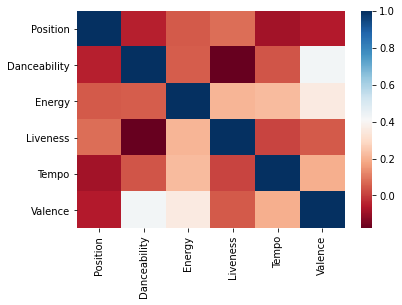

In [ ]:
orig_url='https://drive.google.com/file/d/1x4qb4eJg5l1kbCX-3pyeNPGo5GYxyo7s/view?usp=sharing'
file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
df_Brazil_BC = pd.read_csv(csv_raw)


df_Brazil_BCnew=df_Brazil_BC[['Position','Danceability','Energy','Liveness','Tempo','Valence']]
df_Brazil_BCnew

corr=df_Brazil_BCnew.corr()
display(corr)
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,cmap="RdBu")

df_Brazil_BCnew_before=df_Brazil_BCnew
X1=sm.tools.add_constant(df_Brazil_BCnew_before)
series_before=pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])], index= X1.columns)
display(series_before)

In [ ]:
# Since there's no variable with value above 5, we keep all variables
df_Brazil_BCnew_after=df_Brazil_BCnew_before
X=df_Brazil_BC[['Danceability','Energy','Liveness','Tempo','Valence']]
print(X)
Y=df_Brazil_BC['Position']

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20, random_state=1)

regression_model_Brazil_BC=LinearRegression()
regression_model_Brazil_BC.fit(X_train,y_train)
print( 'This is intercept :') 
print(regression_model_Brazil_BC.intercept_)
print( 'This is coefficeints :') 
print(regression_model_Brazil_BC.coef_)

     Danceability  Energy  Liveness    Tempo  Valence
0           0.671   0.484    0.0778  123.866    0.557
1           0.760   0.715    0.1180  130.075    0.767
2           0.674   0.881    0.0793   98.994    0.234
3           0.800   0.700    0.0938  159.956    0.808
4           0.872   0.971    0.1210  149.987    0.521
..            ...     ...       ...      ...      ...
495         0.666   0.846    0.0840  144.479    0.782
496         0.640   0.904    0.2310  137.926    0.637
497         0.745   0.613    0.2150   90.054    0.622
498         0.820   0.453    0.0868   91.015    0.575
499         0.746   0.489    0.1080  108.008    0.360

[500 rows x 5 columns]
This is intercept :
30.129870548824194
This is coefficeints :
[-1.12563386  6.04772437  3.86734097 -0.04616719 -4.53518106]


> ### **Italy A.C. Model**

,Position,Danceability,Energy,Liveness,Tempo,Valence
Position,1.000000,0.023302,0.055744,-0.005170,0.032977,0.017300
Danceability,0.023302,1.000000,0.126506,-0.142414,-0.014717,0.497715
Energy,0.055744,0.126506,1.000000,0.112354,0.050287,0.361270
Liveness,-0.005170,-0.142414,0.112354,1.000000,-0.081438,0.014561
Tempo,0.032977,-0.014717,0.050287,-0.081438,1.000000,0.105158
Valence,0.017300,0.497715,0.361270,0.014561,0.105158,1.000000


const           61.127220
Position         1.004627
Danceability     1.385752
Energy           1.171945
Liveness         1.053039
Tempo            1.028719
Valence          1.540427
dtype: float64

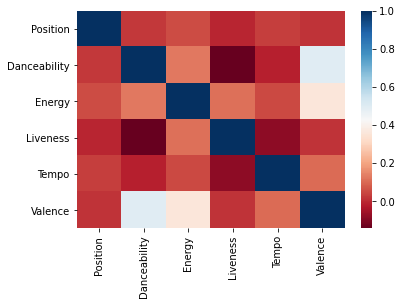

In [ ]:
orig_url='https://drive.google.com/file/d/1XC-wqpqV1Tx8J5FRz8oiSETtxvAA6_7-/view?usp=sharing'

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
df_Italy_AC = pd.read_csv(csv_raw)


df_Italy_ACnew=df_Italy_AC[['Position','Danceability','Energy','Liveness','Tempo','Valence']]
df_Italy_ACnew

corr=df_Italy_ACnew.corr()
display(corr)
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,cmap="RdBu")

df_Italy_ACnew_before=df_Italy_ACnew
X1=sm.tools.add_constant(df_Italy_ACnew_before)
series_before=pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])], index= X1.columns)
display(series_before)

In [ ]:
# Since there's no variable with value above 5, we keep all variables
df_Italy_ACnew_after=df_Italy_ACnew_before
X=df_Italy_AC[['Danceability','Energy','Liveness','Tempo','Valence']]
print(X)
Y=df_Italy_AC['Position']

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20, random_state=1)

regression_model_Italy_AC=LinearRegression()
regression_model_Italy_AC.fit(X_train,y_train)
print( 'This is intercept :') 
print(regression_model_Italy_AC.intercept_)
print( 'This is coefficeints :') 
print(regression_model_Italy_AC.coef_)

     Danceability  Energy  Liveness    Tempo  Valence
0           0.827   0.629     0.084   88.064    0.486
1           0.685   0.764     0.227   80.037    0.315
2           0.618   0.863     0.144  145.891    0.561
3           0.843   0.924     0.112  127.039    0.780
4           0.674   0.774     0.393  112.050    0.330
..            ...     ...       ...      ...      ...
495         0.451   0.714     0.227  125.097    0.310
496         0.519   0.657     0.267   95.690    0.552
497         0.607   0.450     0.114  119.642    0.237
498         0.380   0.503     0.140  143.112    0.279
499         0.749   0.463     0.337   90.028    0.190

[500 rows x 5 columns]
This is intercept :
21.064695492436286
This is coefficeints :
[ 5.04358528e+00  2.03933386e+00 -1.35371135e-02 -3.21104477e-03
  1.50984316e-01]


> ### **Italy B.C. Model**

In [ ]:
orig_url='https://drive.google.com/file/d/1OIjTlEu9M8Yak5FBW1M_qvsxYNCWHRHv/view?usp=sharing'
file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
df_Italy_BC = pd.read_csv(csv_raw)


df_Italy_BCnew=df_Italy_BC[['Position','Danceability','Energy','Liveness','Tempo','Valence']]
df_Italy_BCnew

corr=df_Italy_BCnew.corr()
display(corr)
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,cmap="RdBu")

df_Italy_BCnew_before=df_Italy_BCnew
X1=sm.tools.add_constant(df_Italy_BCnew_before)
series_before=pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])], index= X1.columns)
display(series_before)

In [ ]:
# Since there's no variable with value above 5, we keep all variables
df_Italy_BCnew_after=df_Italy_BCnew_before
X=df_Italy_BC[['Danceability','Energy','Liveness','Tempo','Valence']]
print(X)
Y=df_Italy_BC['Position']

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20, random_state=1)

regression_model_Italy_BC=LinearRegression()
regression_model_Italy_BC.fit(X_train,y_train)
print( 'This is intercept :') 
print(regression_model_Italy_BC.intercept_)
print( 'This is coefficeints :') 
print(regression_model_Italy_BC.coef_)

> ### **US A.C. Model**


In [ ]:
orig_url='https://drive.google.com/file/d/1QvFAMhch8i-0xaZNVqbgRgEwkMM1wmFz/view?usp=sharing'

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
df_US_AC = pd.read_csv(csv_raw)


df_US_ACnew=df_US_AC[['Position','Danceability','Energy','Liveness','Tempo','Valence']]
df_US_ACnew

corr=df_US_ACnew.corr()
display(corr)
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,cmap="RdBu")

df_US_ACnew_before=df_US_ACnew
X1=sm.tools.add_constant(df_US_ACnew_before)
series_before=pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])], index= X1.columns)
display(series_before)

In [ ]:
# Since there's no variable with value above 5, we keep all variables
df_US_ACnew_after=df_US_ACnew_before
X=df_US_AC[['Danceability','Energy','Liveness','Tempo','Valence']]
print(X)
Y=df_US_AC['Position']

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20, random_state=1)

regression_model_US_AC=LinearRegression()
regression_model_US_AC.fit(X_train,y_train)
print( 'This is intercept :') 
print(regression_model_US_AC.intercept_)
print( 'This is coefficeints :') 
print(regression_model_US_AC.coef_)

> ### **US B.C. Model**

In [ ]:
orig_url='https://drive.google.com/file/d/17JiG5xT1KVhD5bEXqZV4bQ7a2wCE3KFj/view?usp=sharing'
file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
df_US_BC = pd.read_csv(csv_raw)


df_US_BCnew=df_US_BC[['Position','Danceability','Energy','Liveness','Tempo','Valence']]
df_US_BCnew

corr=df_US_BCnew.corr()
display(corr)
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,cmap="RdBu")

df_US_BCnew_before=df_US_BCnew
X1=sm.tools.add_constant(df_US_BCnew_before)
series_before=pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])], index= X1.columns)
display(series_before)

In [ ]:
# Since there's no variable with value above 5, we keep all variables
df_US_BCnew_after=df_US_BCnew_before
X=df_US_BC[['Danceability','Energy','Liveness','Tempo','Valence']]
print(X)
Y=df_US_BC['Position']

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20, random_state=1)

regression_model_US_BC=LinearRegression()
regression_model_US_BC.fit(X_train,y_train)
print( 'This is intercept :') 
print(regression_model_US_BC.intercept_)
print( 'This is coefficeints :') 
print(regression_model_US_BC.coef_)

> ### **Vietnam A.C. Model**


In [ ]:
orig_url='https://drive.google.com/file/d/1OtD95fFLlKBaDxOMhZQEN4BLJRGdjieG/view?usp=sharing'

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
df_VT_AC = pd.read_csv(csv_raw)


df_VT_ACnew=df_VT_AC[['Position','Danceability','Energy','Liveness','Tempo','Valence']]
df_VT_ACnew

corr=df_VT_ACnew.corr()
display(corr)
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,cmap="RdBu")

df_VT_ACnew_before=df_VT_ACnew
X1=sm.tools.add_constant(df_VT_ACnew_before)
series_before=pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])], index= X1.columns)
display(series_before)

In [ ]:
# Since there's no variable with value above 5, we keep all variables
df_VT_ACnew_after=df_VT_ACnew_before
X=df_VT_AC[['Danceability','Energy','Liveness','Tempo','Valence']]
print(X)
Y=df_VT_AC['Position']

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20, random_state=1)

regression_model_VT_AC=LinearRegression()
regression_model_VT_AC.fit(X_train,y_train)
print( 'This is intercept :') 
print(regression_model_VT_AC.intercept_)
print( 'This is coefficeints :') 
print(regression_model_VT_AC.coef_)

> ### **Vietnam B.C. Model**

In [ ]:
orig_url='https://drive.google.com/file/d/1SxZ5Z9jpqM4pCCBMARUBXQDYArJToJxo/view?usp=sharing'
file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
df_VT_BC = pd.read_csv(csv_raw)


df_VT_BCnew=df_VT_BC[['Position','Danceability','Energy','Liveness','Tempo','Valence']]
df_VT_BCnew

corr=df_VT_BCnew.corr()
display(corr)
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,cmap="RdBu")

df_VT_BCnew_before=df_VT_BCnew
X1=sm.tools.add_constant(df_VT_BCnew_before)
series_before=pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])], index= X1.columns)
display(series_before)

In [ ]:
# Since there's no variable with value above 5, we keep all variables
df_VT_BCnew_after=df_VT_BCnew_before
X=df_VT_BC[['Danceability','Energy','Liveness','Tempo','Valence']]
print(X)
Y=df_VT_BC['Position']

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20, random_state=1)

regression_model_VT_BC=LinearRegression()
regression_model_VT_BC.fit(X_train,y_train)
print( 'This is intercept :') 
print(regression_model_VT_BC.intercept_)
print( 'This is coefficeints :') 
print(regression_model_VT_BC.coef_)

> ### **New Zealand A.C. Model**


In [ ]:
orig_url='https://drive.google.com/file/d/1K0MKCPRvU4LIshYxLHu_xubgYar8Oln_/view?usp=sharing'

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
df_NZ_AC = pd.read_csv(csv_raw)


df_NZ_ACnew=df_NZ_AC[['Position','Danceability','Energy','Liveness','Tempo','Valence']]
df_NZ_ACnew

corr=df_NZ_ACnew.corr()
display(corr)
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,cmap="RdBu")

df_NZ_ACnew_before=df_NZ_ACnew
X1=sm.tools.add_constant(df_NZ_ACnew_before)
series_before=pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])], index= X1.columns)
display(series_before)

In [ ]:
# Since there's no variable with value above 5, we keep all variables
df_NZ_ACnew_after=df_NZ_ACnew_before
X=df_NZ_AC[['Danceability','Energy','Liveness','Tempo','Valence']]
print(X)
Y=df_NZ_AC['Position']

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20, random_state=1)

regression_model_NZ_AC=LinearRegression()
regression_model_NZ_AC.fit(X_train,y_train)
print( 'This is intercept :') 
print(regression_model_NZ_AC.intercept_)
print( 'This is coefficeints :') 
print(regression_model_NZ_AC.coef_)

> ### **New Zealand B.C. Model**

In [ ]:
orig_url='https://drive.google.com/file/d/1WPjpVvhuDyEXqCjnP65Pz_n9-xq_wg1a/view?usp=sharing'
file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
df_NZ_BC = pd.read_csv(csv_raw)


df_NZ_BCnew=df_NZ_BC[['Position','Danceability','Energy','Liveness','Tempo','Valence']]
df_NZ_BCnew

corr=df_NZ_BCnew.corr()
display(corr)
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,cmap="RdBu")

df_NZ_BCnew_before=df_NZ_BCnew
X1=sm.tools.add_constant(df_NZ_BCnew_before)
series_before=pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])], index= X1.columns)
display(series_before)

In [ ]:
# Since there's no variable with value above 5, we keep all variables
df_NZ_BCnew_after=df_NZ_BCnew_before
X=df_NZ_BC[['Danceability','Energy','Liveness','Tempo','Valence']]
print(X)
Y=df_NZ_BC['Position']

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20, random_state=1)

regression_model_NZ_BC=LinearRegression()
regression_model_NZ_BC.fit(X_train,y_train)
print( 'This is intercept :') 
print(regression_model_NZ_BC.intercept_)
print( 'This is coefficeints :') 
print(regression_model_NZ_BC.coef_)

## **3. Sentiment Analysis**

Import the IBM-Watson Natural Language Understanding API for sentiment analysis

In [ ]:
import requests
import json
import time
import random

def getSentiment(text):
    endpoint = "https://gateway.watsonplatform.net/natural-language-understanding/api/v1/analyze"

    # You can register and get your own credentials
    # The ones below have a quota of 1000 calls per day 
    # and can run out quickly if multiple people use these
    username = "apikey"
    #password = "xSOLcYbCwXT5bRS36huaiwO9kO07_m1EaMa769hTMpcR"
    password = "JjBk20E2nz3jxv9tUkasj1CIcyPOwhcb1uhMhkXdTWEn"
    parameters = {
        'features': 'emotion,sentiment',
        'version' : '2020-08-01',
        'text': text,
        'language' : 'en',
        # url = url_to_analyze, this is an alternative to sending the text
    }

    resp = requests.get(endpoint, params=parameters, auth=(username, password))
    
    return resp.json()

Select tracks appeared most frequently on the list


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dealing_with_data_project/Lyrics/US_Covid_Lyrics.csv")
df
CountTrack = df.TrackArtist.value_counts()
CountTrack[1:10].to_csv("/content/drive/MyDrive/Dealing_with_data_project/Spotify_Dataset/TopUSTracks.csv")
TopTracks=pd.read_csv("/content/drive/MyDrive/Dealing_with_data_project/Spotify_Dataset/TopUSTracks.csv")
TopTracks.head()

,Unnamed: 0,TrackArtist
0,Whoopty CJ,4
1,E-GIRLS ARE RUINING MY LIFE! CORPSE,3
2,Throat Baby (Go Baby) BRS Kash,3
3,Heat Waves Glass Animals,3
4,Astronaut In The Ocean Masked Wolf,3


Search for their lyrics and join in the table

In [ ]:
lyricsfile = pd.read_csv("/content/drive/MyDrive/Dealing_with_data_project/Lyrics/TopUSTracks_Lyrics.csv")
lyricsfile.head()

,TrackArtist,Lyrics,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Con Tus Besos Eslabon Armado,Oh no no\nYeah yeah eh\nNo no no no no no\n\nO...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E-GIRLS ARE RUINING MY LIFE! CORPSE,24hrs\nWhat I need from you\n\nI need your L-O...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Heat Waves Glass Animals,"Our Lord, grant us good in this world\nAnd goo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Daisy Ashnikko,Ashnikko\nHatsune Miku\n\nYou don't wanna see ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Throat Baby (Go Baby) BRS Kash,Damn near got the best head in the world on he...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Use the API to analyze emotions

In [ ]:
text = lyricsfile.Lyrics.values[0]
print(text)
data = getSentiment(text)
data

In [ ]:
CovidSenti = pd.read_csv("/content/drive/MyDrive/Dealing_with_data_project/Lyrics/TopUSTracks_Lyrics_sent.csv")
CovidSenti.head()

,TrackArtist,Lyrics,Anger,Disgust,Fear,Joy,Sadness,Label,Score
0,Con Tus Besos Eslabon Armado,Oh no no\nYeah yeah eh\nNo no no no no no\n\nO...,0.030991,0.000.0075941454,0.015146,0.317888,0.003172,negative,-0.930643
1,E-GIRLS ARE RUINING MY LIFE! CORPSE,24hrs\nWhat I need from you\n\nI need your L-O...,0.435704,0.001454,0.343009,0.114296,0.333497,positive,0.401269
2,Daisy Ashnikko,Ashnikko\nHatsune Miku\n\nYou don't wanna see ...,0.570009,0.009934,0.513222,0.122254,0.015893,negative,-0.753980
3,Throat Baby (Go Baby) BRS Kash,Damn near got the best head in the world on he...,0.858427,0.142371,0.159967,0.008212,0.108509,negative,-0.813960
4,Onna Come Up Lil Eazzyy,"Drivin' lane to lane, I'm off the Wock', I fee...",0.638650,0.075118,0.120752,0.000621,0.187394,negative,-0.968203


As for the pre-Covid period

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dealing_with_data_project/Lyrics/US_Pre_Covid_Lyrics.csv")
df
CountTrack = df.TrackArtist.value_counts()
CountTrack[1:10].to_csv("/content/drive/MyDrive/Dealing_with_data_project/Spotify_Dataset/TopPreTracks.csv")
TopTracks=pd.read_csv("/content/drive/MyDrive/Dealing_with_data_project/Spotify_Dataset/TopPreTracks.csv")
TopTracks.head()

,Unnamed: 0,TrackArtist
0,I Hope Gabby Barrett,3
1,Juicy Doja Cat,3
2,Roses - Imanbek Remix SAINt JHN,3
3,Pop Out (feat. Lil Tjay) Polo G,3
4,Shotta Flow NLE Choppa,3


In [ ]:
lyrics = pd.read_csv("/content/drive/MyDrive/Dealing_with_data_project/Lyrics/TopPreTracks_Lyrics.csv")
lyrics.head()

,TrackArtist,Lyrics
0,Juicy Doja Cat,"I keep it juicy, juicy, I eat that lunch (yeah..."
1,Roses - Imanbek Remix SAINt JHN,"Remix\nOff the corner with the money, I got a ..."
2,Pop Out (feat. Lil Tjay) Polo G,"(CashMoneyAP)\nLil Tjay\n(Niggas gon' hate, I ..."
3,ORANGE SODA Baby Keem,"Eh that's so sad\nKKK, KKK\n\nYoung nigga I go..."
4,I Hope Gabby Barrett,"(Photoshoot)\nYou know, everybody's been telli..."


In [ ]:
PreSenti = pd.read_csv("/content/drive/MyDrive/Dealing_with_data_project/Lyrics/TopPreTracks_sent.csv")
PreSenti.head()

,TrackArtist,Lyrics,Anger,Disgust,Fear,Joy,Sadness,Label,Score
0,Juicy Doja Cat,"I keep it juicy, juicy, I eat that lunch (yeah...",0.001537,0.000199,0.018085,0.020201,0.053449,positive,0.665557
1,Roses - Imanbek Remix SAINt JHN,"Remix\nOff the corner with the money, I got a ...",0.019053,0.000194,0.035820,0.018316,0.081239,negative,-0.784304
2,Pop Out (feat. Lil Tjay) Polo G,"(CashMoneyAP)\nLil Tjay\n(Niggas gon' hate, I ...",0.729888,0.165804,0.111902,0.006940,0.322651,negative,-0.561297
3,ORANGE SODA Baby Keem,"Eh that's so sad\nKKK, KKK\n\nYoung nigga I go...",0.723481,0.183765,0.072937,0.059203,0.267799,negative,-0.423593
4,I Hope Gabby Barrett,"(Photoshoot)\nYou know, everybody's been telli...",0.621456,0.104694,0.104694,0.139390,0.240312,negative,-0.777539


Merge the two tables together

CovidTag=0: Pre-Covid-19 Period

CovidTag=1: Covid-19 Period

In [ ]:
Senti = pd.read_csv("/content/drive/MyDrive/Dealing_with_data_project/Lyrics/Merge_TopUSTracks_sent.csv")
Senti.head()

,TrackArtist,Lyrics,Anger,Disgust,Fear,Joy,Sadness,Label,Score,CovidTag
0,Con Tus Besos Eslabon Armado,Oh no no\nYeah yeah eh\nNo no no no no no\n\nO...,0.030991,0.000.0075941454,0.015146,0.317888,0.003172,negative,-0.930643,1
1,E-GIRLS ARE RUINING MY LIFE! CORPSE,24hrs\nWhat I need from you\n\nI need your L-O...,0.435704,0.001454,0.343009,0.114296,0.333497,positive,0.401269,1
2,Daisy Ashnikko,Ashnikko\nHatsune Miku\n\nYou don't wanna see ...,0.570009,0.009934,0.513222,0.122254,0.015893,negative,-0.753980,1
3,Throat Baby (Go Baby) BRS Kash,Damn near got the best head in the world on he...,0.858427,0.142371,0.159967,0.008212,0.108509,negative,-0.813960,1
4,Onna Come Up Lil Eazzyy,"Drivin' lane to lane, I'm off the Wock', I fee...",0.638650,0.075118,0.120752,0.000621,0.187394,negative,-0.968203,1


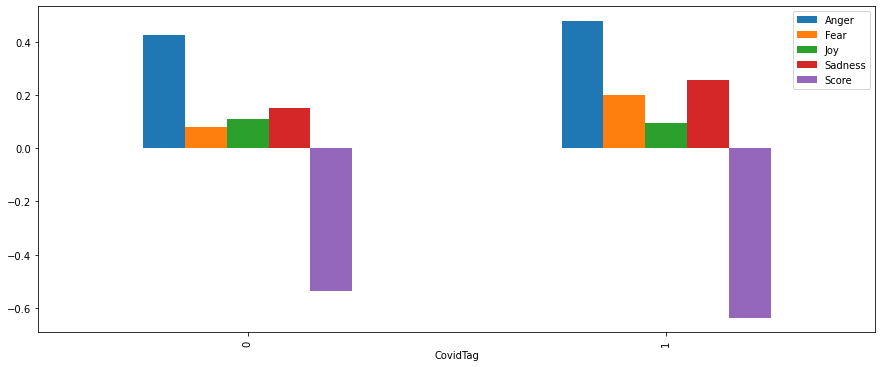

In [ ]:
Senti.groupby('CovidTag').mean().plot(kind='bar',figsize=(15,6))

As we can see from the bar plot: During Covid-19, people in the United States tend to listen to musics which express more anger, more fear, relatively more sadness and less joy. And musics trending during Covid-19 tend to be more negative.

# Conclusions

From the Box-plot, during the Covid period, people in the US(hit the most)tend to listen to more varied range of music tracks(Danceability's box-plot has a wider range), which represent a change of listening behaviors. Compared with Iceland(hit the least),  people stay the same compared with pre covid time. 

From the all countries line plot, we can see all the country has an audio feature drop just right after the Covid start to influence people. We can conclud that all of countries' people tend to have less energy and negative during the period of Covid just started. 

From the density plot, we can tell that During covid-19, people in U.S. tend to listen to tracks with less liveliness and less energy.And it is the same case in Italy. But for Brazil, during the Covid-19 period,people tend to listen to music with enegy more concentrated in 0.6~0.7 scale, which is generally higher than pre-covid period.
For Iceland, New Zealand and Vietnam where Covid-19 hits the least, there is no dynamic change in people's preference.Except in Vietnam, people tend to listen to tracks with less valence.

From the WordCloud image, we can conclude the most frequently mentioned artists are: Pop Smoke, Doja Cat, BTS, Corpse, and Billie Eilish.

From the Timeseries map, we can see in the US and Brazil, which are two countries where the COVID hit the hardest, both danceability and energy shows lower value compared to the same months in the previous year. However in case of Brazil, the value of energy has a slightly higher value when the COVID began to breakout, but over the course of the COVID in the Summer, the value gets lower compared to the same month in 2019.  On the other hand, the values in the countries where the COVID hit the least shows no significant difference compared to pre-COVID period. Liveness and Valence shows no significant trend in change, but tempo in the countries (Vietnam and New Zealand) where the COVID hit the least, tends to get lower compared to pre-COVID period.

From this concise sentiment analysis, we can see from the bar plot that: During Covid-19, people in the United States tend to listen to musics which express more anger, more fear, relatively more sadness and less joy. And musics trending during Covid-19 tend to be more negative.

# Further Steps (Sentiment Analysis)

Firstly we thought about the ssentiment analysis as a broader question. 
We planned to use selenium to get lyrics from a [website](https://www.lyrics.com/). And we managed to run the code and scrapped the lyrics of 600+ songs on the U.S. viral 50 lists. And we stored them into the csv file. But since the IBM API has request limits, the request procedure didn't go well and keeps pumping errors. So here is what we have done so far under this broader concept.



The basic idea of this code is:

1.   Store the tracks' names and artists' names into an excel and read every single line at a time.
2.   Search on https://www.lyrics.com/+Trackname+Artistname.
3.   Click in the first result that is shown on web page.
4.   Use selenium to find the 'lyrics' element by its Xpath.
5.   Get the text of the lyrics and store it back to the excel.


This function has drawbacks, because sometimes what is shown as the first result doesn't match with the exact song we are searching for.

In [ ]:
pip install selenium

In [ ]:
pip install webdriver-manager

In [ ]:
import os
import numpy as np
import pandas as pd
import xlrd
from tqdm import tqdm
import time
import re
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import NoSuchElementException
import urllib.request
from urllib.request import urlretrieve
import os
import random
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import xlrd

import tkinter as tk
from tkinter import messagebox



In [ ]:
# install chromium, its driver, and selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin



In [ ]:
main_file_first=pd.read_excel('/Users/carolynabai/Desktop/Lyrics.xlsx',sheet_name='Sheet1')

Track_list=main_file_first.Track.tolist()

headers={
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
        'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'zh-CN,zh;q=0.9', 'Cache-Control': 'max-age=0',
        'Cookie': 'PSTM=1552363818; BIDUPSID=313F8D16C32DA3532FFA82AF7DEC5492; MCITY=-131%3A; BAIDUID=A1E69A9C846DA2014FC4C15E1AB0D465:FG=1; log_guid=3ced89abfc82c0049e3e5eb3ba9ce07e; ZX_HISTORY=%5B%7B%22visittime%22%3A%222020-09-30+13%3A00%3A44%22%2C%22pid%22%3A%22xlTM-TogKuTwxPdBBM%2ApHbuFbbW4hG8OJQmd%22%7D%2C%7B%22visittime%22%3A%222020-09-29+12%3A03%3A28%22%2C%22pid%22%3A%22xlTM-TogKuTwj1-eh8eqz33I2kOmy1uXvQmd%22%7D%5D; Hm_lvt_baca6fe3dceaf818f5f835b0ae97e4cc=1601281179,1601803397; ZX_UNIQ_UID=9d9792f50b3c3cac0c9c661b12622a52; delPer=0; PSINO=1; BDORZ=B490B5EBF6F3CD402E515D22BCDA1598; H_PS_PSSID=32757_32617_1450_32737_7566_7546_31660_32723_32231_7516_7605_32115_32719; BDPPN=839f7a7c420891ae9afb278126280513; BDUSS=hUfkN3ZHlyZVJnc2d6SnpxNGFHdkowOXlKOGdWOGNIT3dDS3o3eDk4fm9KYUZmRVFBQUFBJCQAAAAAAAAAAAEAAAASI~IUZ3Vvd2VpOTcxMTYwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOiYeV~omHlfa0; BDUSS_BFESS=hUfkN3ZHlyZVJnc2d6SnpxNGFHdkowOXlKOGdWOGNIT3dDS3o3eDk4fm9KYUZmRVFBQUFBJCQAAAAAAAAAAAEAAAASI~IUZ3Vvd2VpOTcxMTYwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOiYeV~omHlfa0; Hm_lpvt_baca6fe3dceaf818f5f835b0ae97e4cc=1601804524',
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36'}

def get_table(Track_list):

    notfound=[]
    result=pd.DataFrame(columns=['Track','Lyrics'])

    chrome_options=webdriver.ChromeOptions()
    chrome_options.add_argument("user-agent=Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36")

    dr = webdriver.Chrome(ChromeDriverManager().install(),chrome_options=chrome_options)
    dr.maximize_window()

    for Track in tqdm(Track_list):

        print(Track)
        try:
            Track_adjusted=Track.strip()
            url='https://www.lyrics.com/lyrics/'+Track_adjusted
            dr.get(url)
            random_time=random.randint(3,5)
            time.sleep(random_time)  
            try:
                a = dr.find_element_by_xpath('//*[@id="content-body"]/div/div[5]/div[1]')
                a.click()
                time.sleep(random_time)
                
                try:
                        lyrics=dr.find_element_by_xpath('//*[@id="lyric-body-text"]').text
                        time.sleep(random_time)
                except:
                        lyrics='-'
                        print("didn't find lyrics")
                               
            except NoSuchElementException:
                    lyrics='-'
                    print("didn't find result")
                    
            new_table=pd.DataFrame({'Track':Track_adjusted,'Lyrics':lyrics},index=[0])
            result=result.append(new_table,ignore_index=True)
            result.reset_index(drop=True,inplace=True)
            #print(result)

        except:
            notfound.append(Track)
            result.to_excel('/Users/carolynabai/Desktop/Lyrics/temp.xlsx')
        random_time=random.randint(3,5)
        time.sleep(random_time)  
    dr.quit()
    return result,notfound
    

for i in range(0,10):
    result,notfound=get_table(Track_list[i*10:(i+1)*10])
    result.to_excel('/Users/carolynabai/Desktop/Lyrics/Track'+str(i*10)+'-'+str((i+1)*10)+'.xlsx')


I didn't managed to install webdriver on google collab, so I run the code on my computer and the progress bar is as shown below. I sliced the excel file into small pieces and perform search in groups, so once the network breaks down I don't lose all of the data I scrapped earlier.

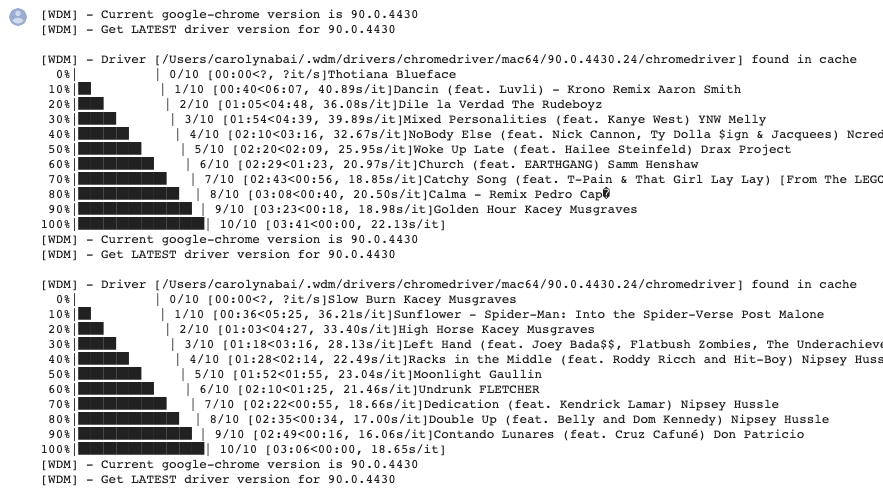

Import IBM-Watson Natural Language Understanding API

In [ ]:
pip install --upgrade "ibm-watson>=5.1.0"

In [ ]:
lyricsfile = pd.read_csv("/content/drive/MyDrive/Dealing_with_data_project/Lyrics/US_Pre-covid_Lyrics.csv")
print (lyricsfile)

In [ ]:
import requests
import json
import time
import random

def getSentiment(text):
    endpoint = "https://gateway.watsonplatform.net/natural-language-understanding/api/v1/analyze"

    # You can register and get your own credentials
    # The ones below have a quota of 1000 calls per day 
    # and can run out quickly if multiple people use these
    username = "apikey"
    #password = "xSOLcYbCwXT5bRS36huaiwO9kO07_m1EaMa769hTMpcR"
    password = "JjBk20E2nz3jxv9tUkasj1CIcyPOwhcb1uhMhkXdTWEn"
    parameters = {
        'features': 'emotion,sentiment',
        'version' : '2020-08-01',
        'text': text,
        'language' : 'en',
        # url = url_to_analyze, this is an alternative to sending the text
    }

    resp = requests.get(endpoint, params=parameters, auth=(username, password))
    
    return resp.json()

In [ ]:
angers = []
disgusts = []
fears = []
joys = []
sadnesses = []
labels = []
scores = []

In [ ]:
random_time=random.randint(3,5)

In [ ]:
for i in range(len(lyricsfile.Lyrics.values)):#This is where I got stucked, sometime the API does not return Json because of the request limits
      text = lyricsfile.Lyrics.values[i]
      time.sleep(random_time)
      data = getSentiment(text)

      anger = data['emotion']['document']['emotion']['anger']
      angers.append(anger)
      disgust = data['emotion']['document']['emotion']['disgust']
      disgusts.append(disgust)
      fear = data['emotion']['document']['emotion']['fear']
      fears.append(fear)
      joy = data['emotion']['document']['emotion']['joy']
      joys.append(joy)
      sadness = data['emotion']['document']['emotion']['sadness']
      sadnesses.append(sadness)
      label = data['sentiment']['document']['label']
      labels.append(label)
      score = data['sentiment']['document']['score']
      scores.append(score)

      print(text)

In [ ]:
lyricsfile['anger']=angers
lyricsfile['disgust']=disgusts
lyricsfile['fear']=fears
lyricsfile['joy']=joys
lyricsfile['sadness']=sadnesses
lyricsfile['label']=labels
lyricsfile['score']=scores

If we have conquered the API issue, then we can perform the sentiment analysis more thoroughly. We can fetch the sentiment data for all 600 songs in the database and analyze based on that, instead of selecting 10 most trending tracks from the pre-Covid and Covid period. Also different rank should also be considered as a factor in this analysis.It should add weight to the value of sentiment. As the rank goes higher, the sentiment value of this track can better represent people's change of music tastes.